In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Beijing Multisite air Quality data.csv')

# Display initial data information
print(df.head())
print(df.info())
print(df.describe())

# Reduce dataset size by selecting every fifth record
df_reduced = df.iloc[::5, :]

# Display reduced data information
print(df_reduced.head())
print(df_reduced.info())

# Save the reduced dataset if needed
df_reduced.to_csv('Beijing_Multisite_air_Quality_data_reduced2.csv', index=False)


   year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  \
0  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0   
1  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2   
2  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5   
3  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5   
4  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2   

   DEWP  RAIN   wd  WSPM       station  
0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1 -18.2   0.0    N   4.7  Aotizhongxin  
2 -18.2   0.0  NNW   5.6  Aotizhongxin  
3 -19.4   0.0   NW   3.1  Aotizhongxin  
4 -19.5   0.0    N   2.0  Aotizhongxin  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  


In [2]:
print(df.isnull().sum())

print(df.duplicated().sum())

df = df.drop_duplicates()

df = df.fillna(method='ffill')

year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64
0


In [3]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

df.set_index('datetime', inplace=True)

df.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

print(df.head())


                     PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  \
datetime                                                                        
2013-03-01 00:00:00    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0 -18.8   
2013-03-01 01:00:00    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2 -18.2   
2013-03-01 02:00:00    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5 -18.2   
2013-03-01 03:00:00    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5 -19.4   
2013-03-01 04:00:00    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2 -19.5   

                     RAIN   wd  WSPM       station  
datetime                                            
2013-03-01 00:00:00   0.0  NNW   4.4  Aotizhongxin  
2013-03-01 01:00:00   0.0    N   4.7  Aotizhongxin  
2013-03-01 02:00:00   0.0  NNW   5.6  Aotizhongxin  
2013-03-01 03:00:00   0.0   NW   3.1  Aotizhongxin  
2013-03-01 04:00:00   0.0    N   2.0  Aotizhongxin  


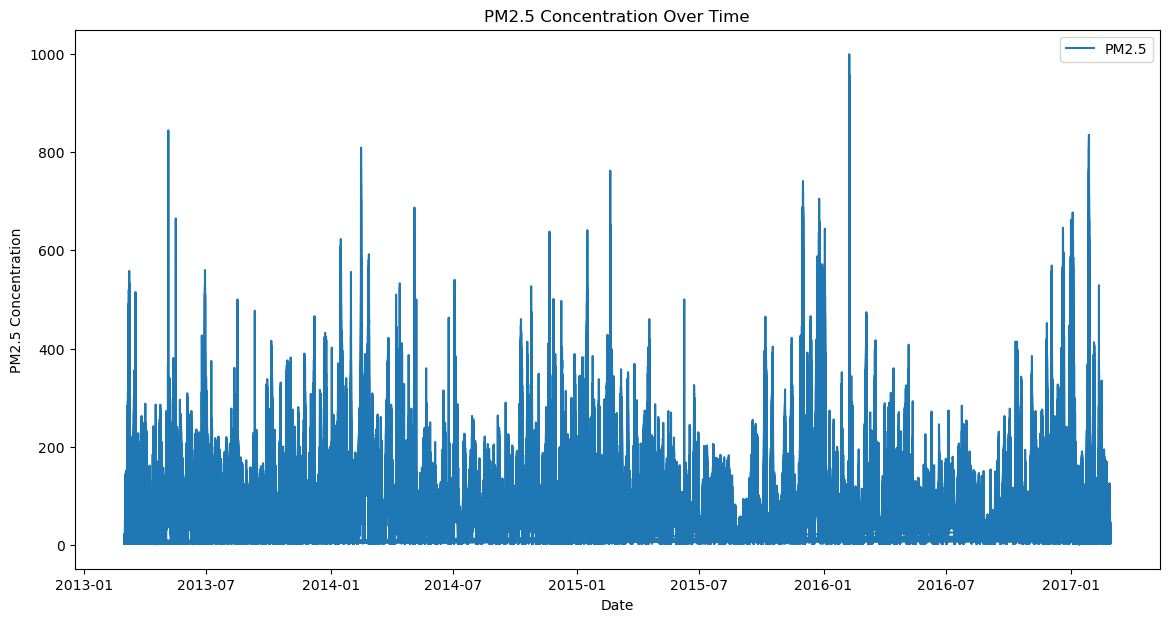

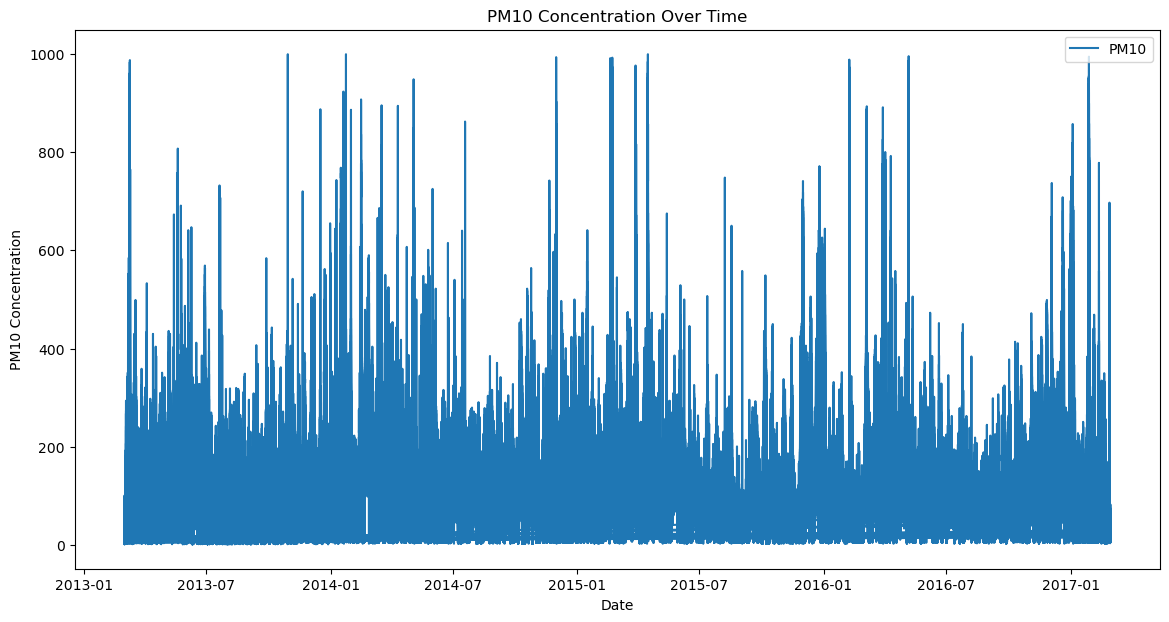

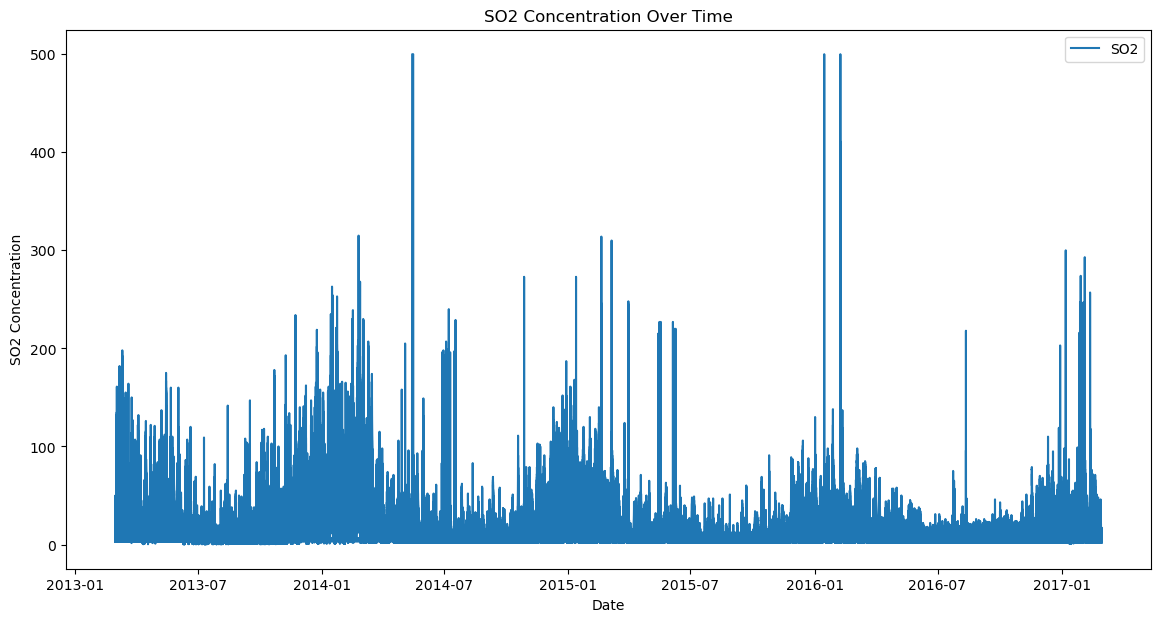

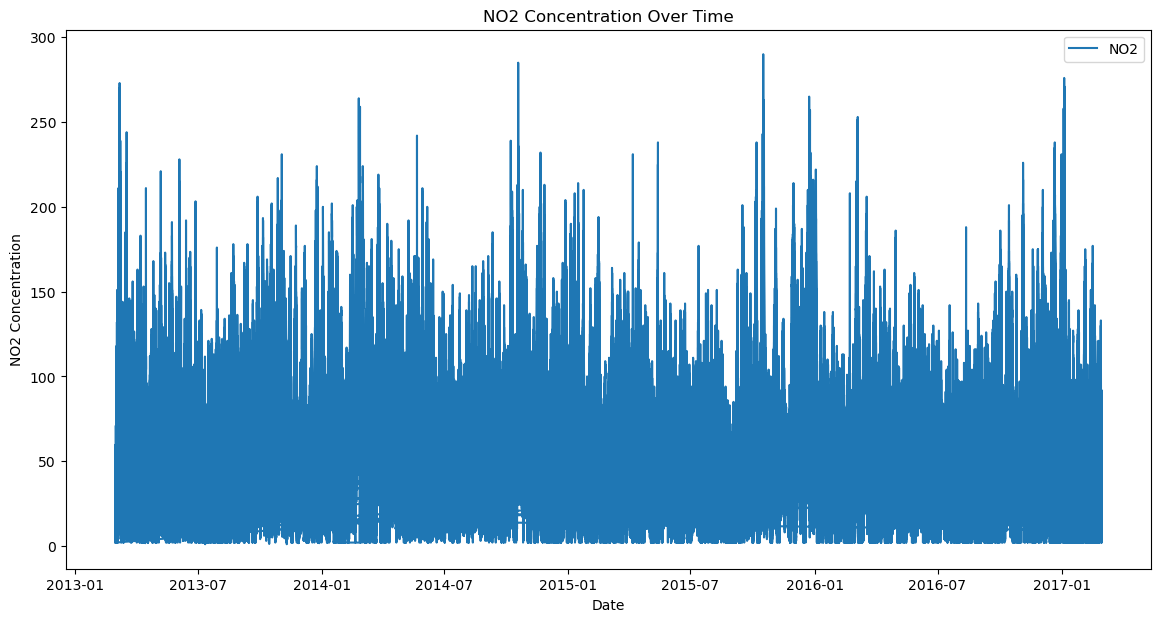

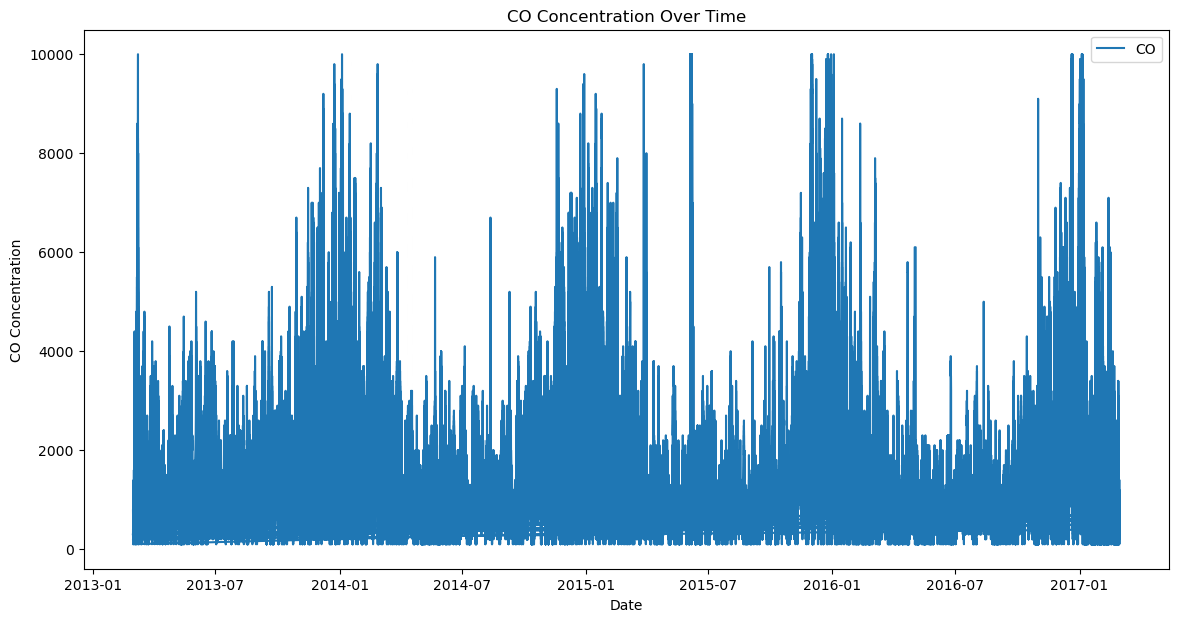

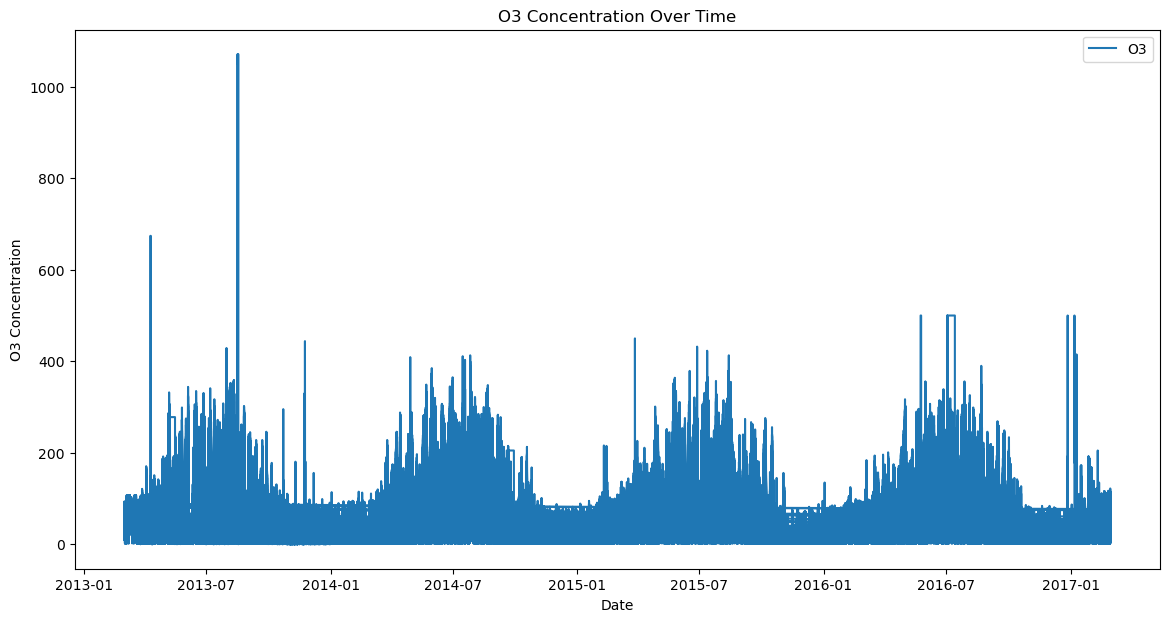

In [4]:
import matplotlib.pyplot as plt

# Plot PM2.5 concentration over time
plt.figure(figsize=(14, 7))
plt.plot(df['PM2.5'], label='PM2.5')
plt.title('PM2.5 Concentration Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.legend()
plt.show()

# Plot other pollutants
pollutants = ['PM10', 'SO2', 'NO2', 'CO', 'O3']
for pollutant in pollutants:
    plt.figure(figsize=(14, 7))
    plt.plot(df[pollutant], label=pollutant)
    plt.title(f'{pollutant} Concentration Over Time')
    plt.xlabel('Date')
    plt.ylabel(f'{pollutant} Concentration')
    plt.legend()
    plt.show()


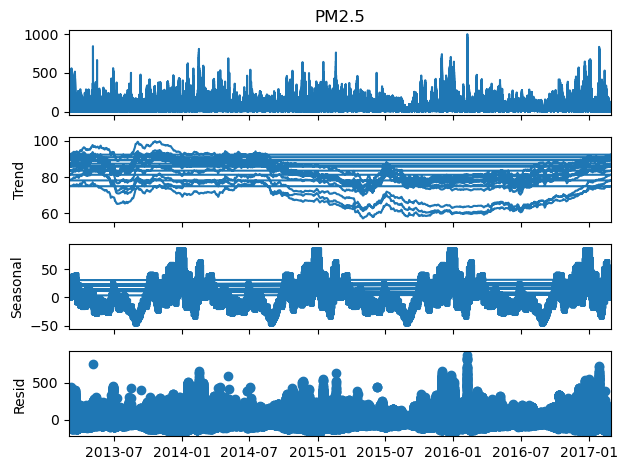

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['PM2.5'], model='additive', period=24*365)
decomposition.plot()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['PM2.5'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['PM2.5'].dropna(), order=(1, 1, 1))
model_fit = model.fit()

print(model_fit.summary())


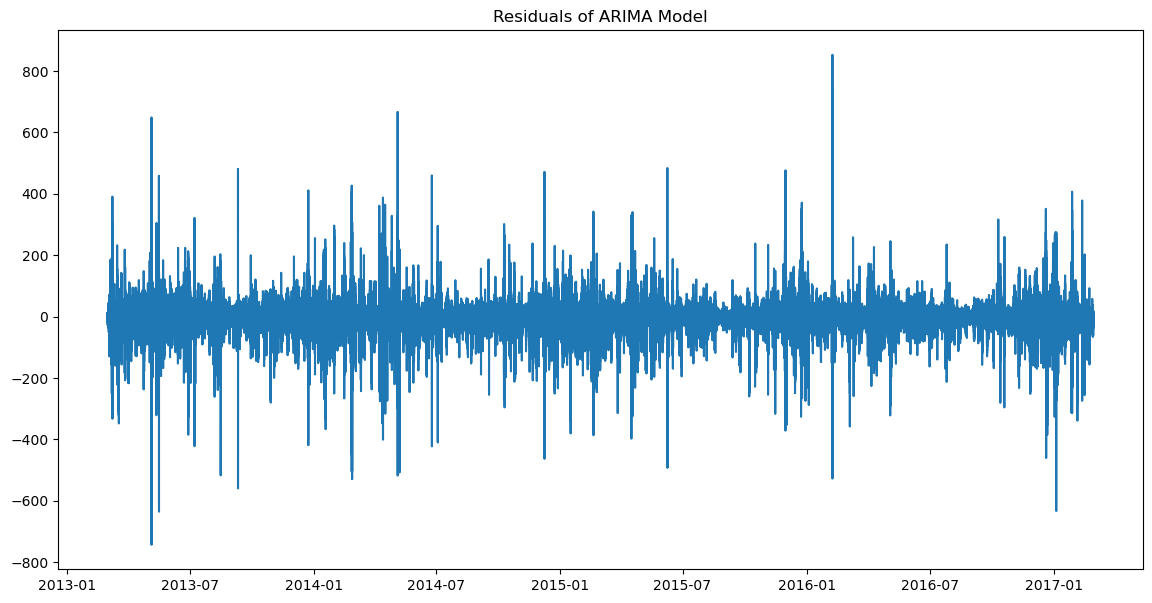

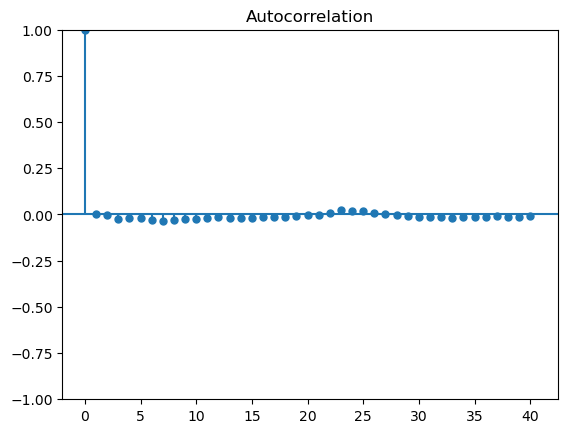

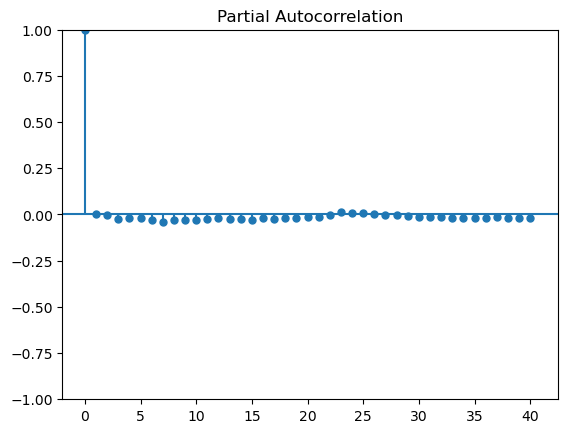

        lb_stat  lb_pvalue
10  2380.899554        0.0


In [8]:
residuals = model_fit.resid
plt.figure(figsize=(14, 7))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(residuals, lags=40)
plot_pacf(residuals, lags=40)
plt.show()

from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(lb_test)


420768    13.247677
420769    13.246139
420770    13.246148
420771    13.246148
420772    13.246148
420773    13.246148
420774    13.246148
420775    13.246148
420776    13.246148
420777    13.246148
Name: predicted_mean, dtype: float64
        lower PM2.5  upper PM2.5
420768   -26.270094    52.765448
420769   -47.821315    74.313592
420770   -63.518065    90.010361
420771   -76.510636   103.002932
420772   -87.846957   114.339253
420773   -98.034360   124.526657
420774  -107.364329   133.856625
420775  -116.022653   142.514949
420776  -124.136378   150.628674
420777  -131.796929   158.289225


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Luke Holmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


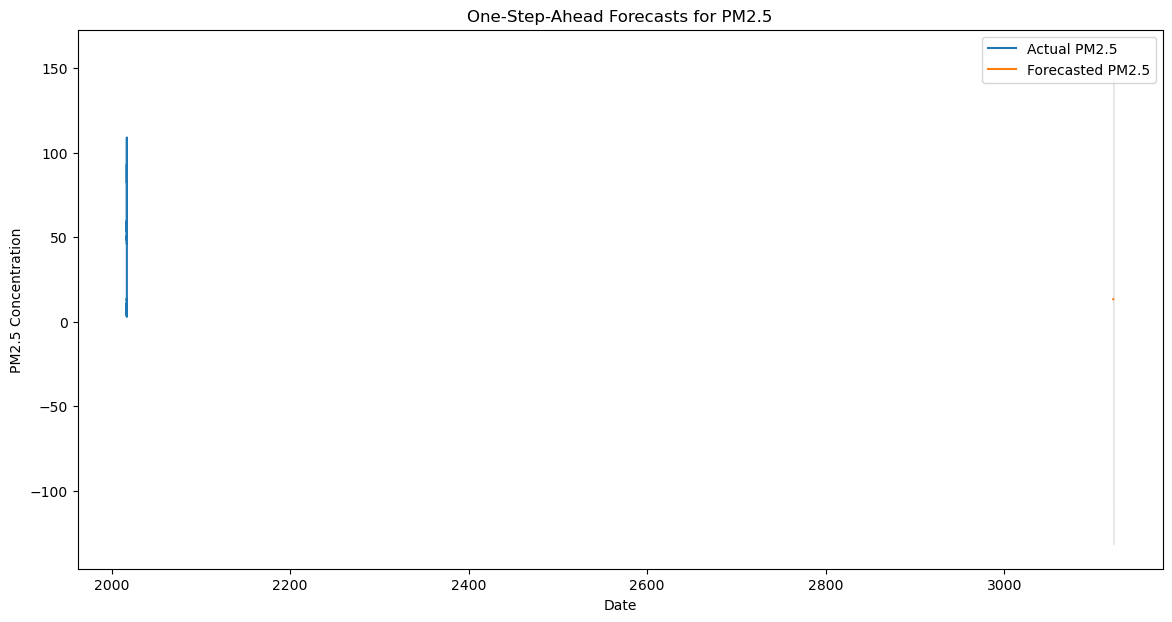

Forecast Errors: 2017-02-28 14:00:00   NaN
2017-02-28 15:00:00   NaN
2017-02-28 16:00:00   NaN
2017-02-28 17:00:00   NaN
2017-02-28 18:00:00   NaN
2017-02-28 19:00:00   NaN
2017-02-28 20:00:00   NaN
2017-02-28 21:00:00   NaN
2017-02-28 22:00:00   NaN
2017-02-28 23:00:00   NaN
420768                NaN
420769                NaN
420770                NaN
420771                NaN
420772                NaN
420773                NaN
420774                NaN
420775                NaN
420776                NaN
420777                NaN
dtype: float64


In [9]:
forecast = model_fit.get_forecast(steps=10)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

print(forecast_mean)
print(forecast_ci)

plt.figure(figsize=(14, 7))
plt.plot(df['PM2.5'][-50:], label='Actual PM2.5')
plt.plot(forecast_mean, label='Forecasted PM2.5')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.2)
plt.title('One-Step-Ahead Forecasts for PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.legend()
plt.show()

actual = df['PM2.5'][-10:]
forecast_errors = actual - forecast_mean
print('Forecast Errors:', forecast_errors)


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luke Holmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luke Holmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luke Holmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\L

2017-03-01 00:00:00    13.247677
2017-03-01 01:00:00    13.246139
2017-03-01 02:00:00    13.246148
2017-03-01 03:00:00    13.246148
2017-03-01 04:00:00    13.246148
2017-03-01 05:00:00    13.246148
2017-03-01 06:00:00    13.246148
2017-03-01 07:00:00    13.246148
2017-03-01 08:00:00    13.246148
2017-03-01 09:00:00    13.246148
Freq: H, Name: predicted_mean, dtype: float64
                     lower PM2.5  upper PM2.5
2017-03-01 00:00:00   -26.270094    52.765448
2017-03-01 01:00:00   -47.821315    74.313592
2017-03-01 02:00:00   -63.518065    90.010361
2017-03-01 03:00:00   -76.510636   103.002932
2017-03-01 04:00:00   -87.846957   114.339253
2017-03-01 05:00:00   -98.034360   124.526657
2017-03-01 06:00:00  -107.364329   133.856625
2017-03-01 07:00:00  -116.022653   142.514949
2017-03-01 08:00:00  -124.136378   150.628674
2017-03-01 09:00:00  -131.796929   158.289225


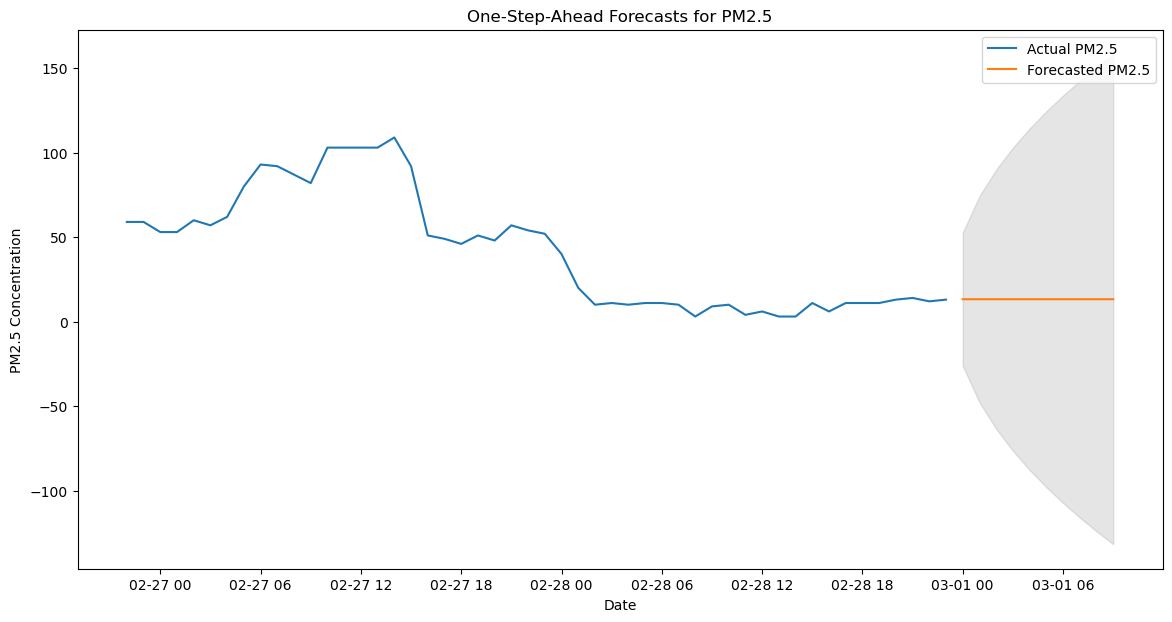

Forecast Errors: 2017-02-28 14:00:00   NaN
2017-02-28 15:00:00   NaN
2017-02-28 16:00:00   NaN
2017-02-28 17:00:00   NaN
2017-02-28 18:00:00   NaN
2017-02-28 19:00:00   NaN
2017-02-28 20:00:00   NaN
2017-02-28 21:00:00   NaN
2017-02-28 22:00:00   NaN
2017-02-28 23:00:00   NaN
2017-03-01 00:00:00   NaN
2017-03-01 01:00:00   NaN
2017-03-01 02:00:00   NaN
2017-03-01 03:00:00   NaN
2017-03-01 04:00:00   NaN
2017-03-01 05:00:00   NaN
2017-03-01 06:00:00   NaN
2017-03-01 07:00:00   NaN
2017-03-01 08:00:00   NaN
2017-03-01 09:00:00   NaN
dtype: float64


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df['PM2.5'], order=(1, 1, 1))
model_fit = model.fit()

forecast = model_fit.get_forecast(steps=10)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=11, freq='H')[1:]
forecast_mean.index = forecast_dates
forecast_ci.index = forecast_dates

print(forecast_mean)
print(forecast_ci)

plt.figure(figsize=(14, 7))
plt.plot(df['PM2.5'][-50:], label='Actual PM2.5')
plt.plot(forecast_mean, label='Forecasted PM2.5')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.2)
plt.title('One-Step-Ahead Forecasts for PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.legend()
plt.show()

actual = df['PM2.5'][-10:]
forecast_errors = actual - forecast_mean[:10]
print('Forecast Errors:', forecast_errors)


C:\Users\Luke Holmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luke Holmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luke Holmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luke Holmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\L

Forecast Errors: datetime
2015-07-25 14:00:00   -18.044084
2015-07-25 15:00:00   -20.136293
2015-07-25 16:00:00   -12.134866
2015-07-25 17:00:00   -18.134888
2015-07-25 18:00:00    -3.134887
                         ...    
2017-02-28 19:00:00   -77.134887
2017-02-28 20:00:00   -75.134887
2017-02-28 21:00:00   -74.134887
2017-02-28 22:00:00   -76.134887
2017-02-28 23:00:00   -75.134887
Length: 84154, dtype: float64
Mean Squared Error: 7269.532743495981


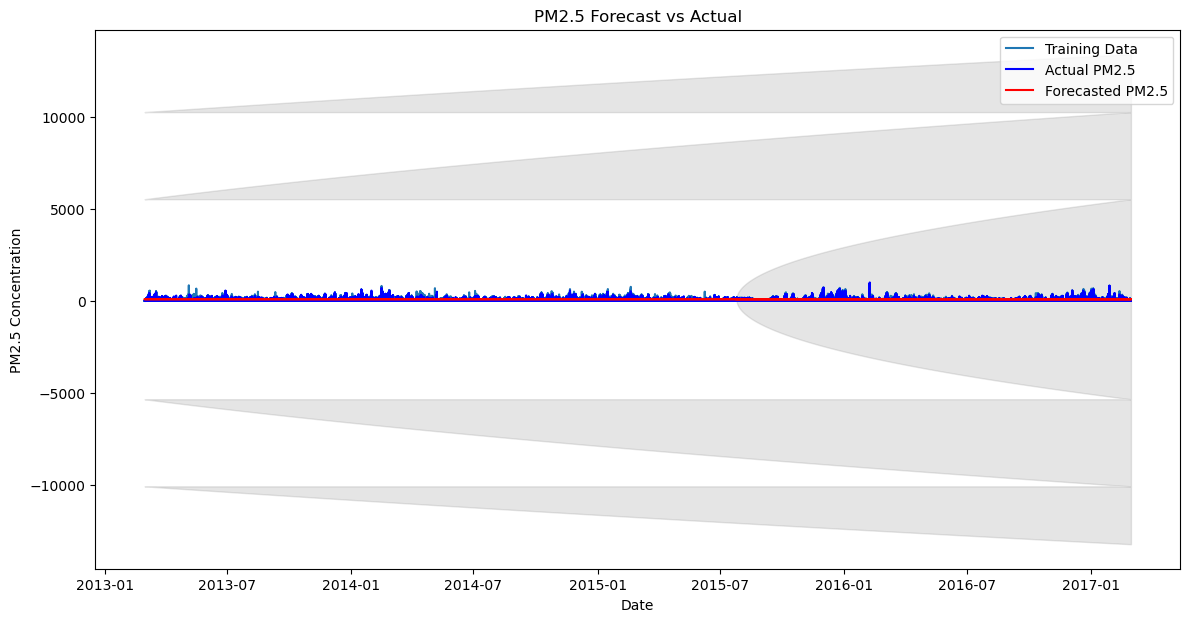

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
df = pd.read_csv('Beijing Multisite air Quality data.csv')
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)
df = df.drop(columns=['year', 'month', 'day', 'hour'])
df = df.drop_duplicates()
df = df.fillna(method='ffill')
train_size = int(len(df) * 0.8)
train, test = df['PM2.5'][:train_size], df['PM2.5'][train_size:]
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
forecast_mean.index = test.index
forecast_ci.index = test.index
forecast_errors = test - forecast_mean
print('Forecast Errors:', forecast_errors)
mse = mean_squared_error(test, forecast_mean)
print('Mean Squared Error:', mse)
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual PM2.5', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='Forecasted PM2.5', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.2)
plt.title('PM2.5 Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.legend()
plt.show()


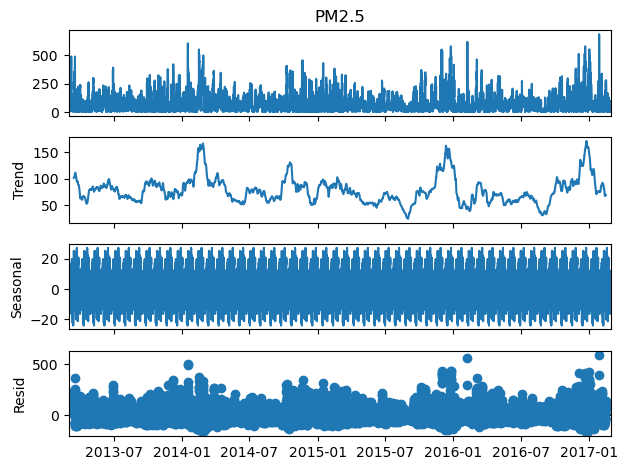

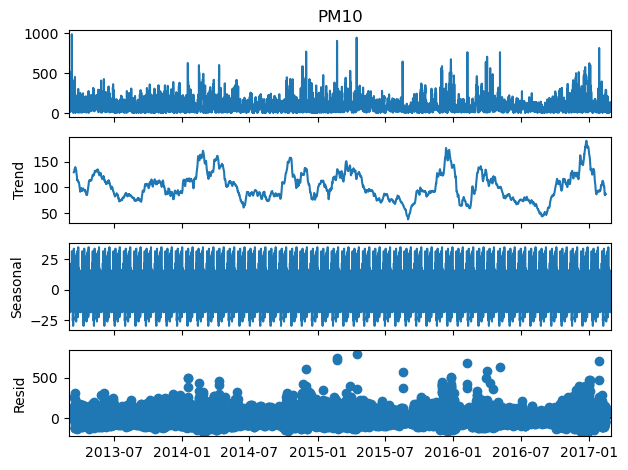

In [20]:
import pandas as pd
import plotly.express as px
import dash
import dash_bootstrap_components as dbc
from dash import dcc, html
from dash.dependencies import Input, Output
import folium

df = pd.read_csv('Beijing Multisite air Quality data.csv')

df_reduced = df.iloc[::20, :].copy()

df_reduced['datetime'] = pd.to_datetime(df_reduced[['year', 'month', 'day', 'hour']])
df_reduced.set_index('datetime', inplace=True)
df_reduced.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)
df_reduced.drop_duplicates(inplace=True)
df_reduced.fillna(method='ffill', inplace=True)

df_reduced = df_reduced[~df_reduced.index.duplicated(keep='first')]
df_reduced = df_reduced.sort_index()

def create_time_series_plot(df, pollutant):
    fig = px.line(df, x=df.index, y=pollutant, title=f'{pollutant} Concentration Over Time')
    return fig

def create_folium_map(df):
    station_coords = {
        'Aotizhongxin': [39.982, 116.345],
        'Changping': [40.218, 116.231],
        'Dingling': [40.292, 116.227],
        'Dongsi': [39.928, 116.417],
        'Guanyuan': [39.929, 116.347],
        'Gucheng': [39.911, 116.173],
        'Huairou': [40.375, 116.623],
        'Nongzhanguan': [39.937, 116.461],
        'Shunyi': [40.128, 116.654],
        'Tiantan': [39.882, 116.407],
        'Wanliu': [39.999, 116.310],
        'Wanshouxigong': [39.886, 116.352]
    }

    df['coords'] = df['station'].map(station_coords)

    m = folium.Map(location=[39.9042, 116.4074], zoom_start=10)

    for _, row in df.iterrows():
        folium.CircleMarker(
            location=row['coords'],
            radius=5,
            popup=folium.Popup(f"Station: {row['station']}<br>PM2.5: {row['PM2.5']}", max_width=300),
            color='blue',
            fill=True,
            fill_color='blue'
        ).add_to(m)
    
    return m

app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1("Beijing Air Quality Dashboard"), className="mb-2")
    ]),
    dbc.Row([
        dbc.Col([
            html.Label('Select Pollutant'),
            dcc.Dropdown(
                id='pollutant-dropdown',
                options=[{'label': p, 'value': p} for p in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']],
                value='PM2.5'
            ),
            dcc.Graph(id='time-series-plot'),
        ], width=8),
    ]),
    dbc.Row([
        dbc.Col(html.Label('Air Quality Map'), className="mb-2"),
        dbc.Col(html.Iframe(id='folium-map', srcDoc=create_folium_map(df_reduced)._repr_html_(), width='100%', height='600'))
    ])
])

@app.callback(
    Output('time-series-plot', 'figure'),
    Input('pollutant-dropdown', 'value')
)
def update_time_series_plot(pollutant):
    time_series_plot = create_time_series_plot(df_reduced, pollutant)
    return time_series_plot

if __name__ == '__main__':
    app.run_server(debug=True)
